# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [1]:
import pandas as pd

arquivo = 'data/Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(arquivo)
data = data.drop(columns=['state', 'area_code', 'phone_number'])

## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [2]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

# Escalonamento 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer
from sklearn.feature_extraction import DictVectorizer

lb = LabelBinarizer()
data_labelbinary=data
data_labelbinary['intl_plan']=lb.fit_transform(data_labelbinary['intl_plan'])
data_labelbinary['voice_mail_plan']=lb.fit_transform(data_labelbinary['voice_mail_plan'])
data_labelbinary['churned']=lb.fit_transform(data_labelbinary['churned'])


bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']



## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [3]:
# kNN 

x_cols = [x for x in data.columns if x != 'churned']

X_data = data[x_cols]
y_data = data.churned

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2) 
knn.fit(X_data, y_data) 
predict = knn.predict(X_data)
print(predict)

[0 0 0 ... 0 0 0]


## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [25]:
def accuracy(real, predict):
    a = [1 for i, j in zip(real, predict) if i == j]
    a = 1.0*sum(a)/predict.size
    return a
accuracy(y_data, predict)

0.9164

## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [28]:
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski', p=2) 
knn_distance.fit(X_data, y_data)
predict_dist = knn_distance.predict(X_data)
print(accuracy(y_data, predict_dist))
#estou comparando os mesmos dados
knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='minkowski', p=1) 
knn_uniform.fit(X_data, y_data)
predict_uniform = knn_uniform.predict(X_data)
print(accuracy(y_data, predict_uniform))

1.0
0.9182


## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [40]:
score_list = list()

'''escreva no bloco abaixo'''
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2) 
    knn.fit(X_data, y_data)
    predict = knn.predict(X_data)
    score_list.append([i,accuracy(y_data, predict)])
'''fim do código'''

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [44]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

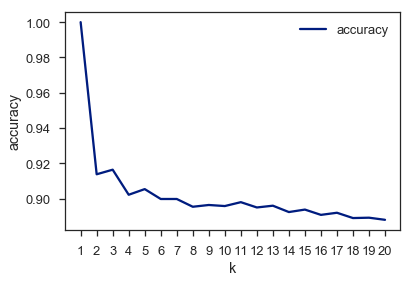

In [45]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));

In [ ]:
#o próprio valor é vizinho dele quando k=1